# **Lab 8: Quantum Key Distribution**
---

### **Description**
In this week's lab, we will implement the Quantum Key Distribution protocol that we learned about in lecture: BB84. This notebook is divided into four parts:
0. Imports
1. Warm-up
2. Quantum Key Distribution: BB84
3. Eve Intercepts!

<br>

### **Cheat Sheets**

[Qiskit](https://docs.google.com/document/d/1WKvv22SC7pA0TCqCJnxgZOf2tHjvTotaHYEtOx2FNkI/edit?usp=share_link)

[Loops and Conditionals](https://docs.google.com/document/d/1DugvjFBqCvunzPQzPYJh7j_0uJNctHJj3HdYvrTRyq0/edit?usp=share_link)

[Python Basics](https://docs.google.com/document/d/1EClH0n3VPTu17QUh55Y1BttkxHjTIAiC00xm4vHZ0Hc/edit?usp=share_link)

---

## **Part 0: Imports**
---

**Run the code below before continuing.**

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from numpy.random import randint # generate random numbers
import numpy as np

## **Part 1: Warm-up**
---

Let's start by doing a few exercises that will help us write the code for QKD and understand what is happening throughout.

#### **Exercise #1** 
**Together**, 
1. Create a circuit with 1 qubit and 1 classical bit.
2. Apply a Hadamard gate. This simulates Alice putting a qubit currently in the $| 0 \rangle$ state into superposition.
4. Make a measurement. This simulates Bob measuring the qubit without taking it out of superposition. He incorrectly guessed what Alice did for this bit.

<br>

**Then run the simulation code.**

What is the probability of observing 0 or 1?

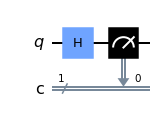

In [2]:
qc = QuantumCircuit(1,1)

# Alice putting |0> in superposition
# ADD GATE HERE
qc.h(0)
# Bob measuring without taking out of superposition
qc.measure(0, 0)

qc.draw()

**Run the code below to simulate the measurement results using QASM.**

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


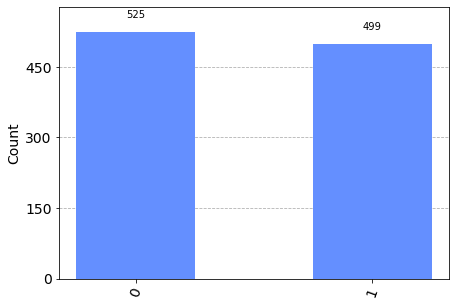

In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### **Exercise #2** 
**Together**, 
1. Create a circuit with 1 qubit and 1 classical bit.
2. Apply a Hadamard gate. This simulates Alice putting a qubit currently in the $| 0 \rangle$ state into superposition.
4. Apply another Hadamard gate and make a measurement. This simulates Bob taking the qubit out of superposition. He correctly guessed what Alice did for this bit.

<br>

**Then run the simulation code.**

What is the probability of observing 0 or 1?

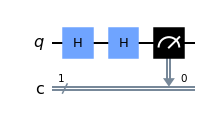

In [4]:
qc = QuantumCircuit(1,1)

# Alice putting |0> in superposition
# ADD GATE HERE
qc.h(0)
qc.h(0)
# Bob taking qubit out of superposition and measuring
# ADD GATE HERE
qc.measure(0, 0)


qc.draw()

**Run the code below to simulate the measurement results using QASM.**

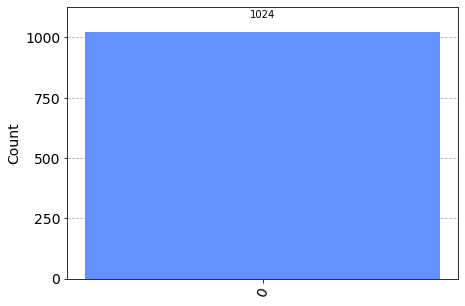

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### **Exercise #3** 
**Independently**, 
1. Create a circuit with 1 qubit and 1 classical bit.
2. Do nothing yet. This simulates Alice sending a qubit in the $| 0 \rangle$ state.
4. Apply a Hadamard gate and make a measurement. This simulates Bob taking the qubit out of superposition. He incorrectly guessed what Alice did for this bit.

<br>

**Then run the simulation code.**

What is the probability of observing 0 or 1?

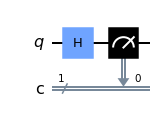

In [6]:
qc = QuantumCircuit(1,1)

# Alice "sending" a |0>


# Bob incorrectly thinking that he's taking qubit out of superposition and measuring

# ADD GATE HERE
qc.h(0)
qc.measure(0, 0)


qc.draw()

**Run the code below to simulate the measurement results using QASM.**

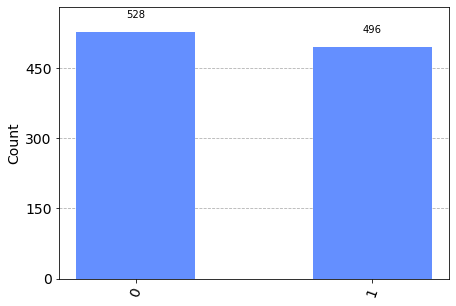

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### **Exercise #4** 
**Independently**, 
1. Create a circuit with 1 qubit and 1 classical bit.
2. Apply an X gate and a Hadamard gate. This simulates Alice putting a qubit currently in the $| 1 \rangle$ state into superposition.
4. Apply another Hadamard gate and make a measurement. This simulates Bob taking the qubit out of superposition.

<br>

**Then run the simulation code.**

What is the probability of observing 0 or 1?

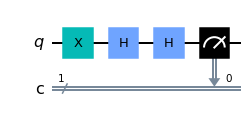

In [8]:
qc = QuantumCircuit(1,1)

qc.x(0)
#Alice Key
qc.h(0)

#Bob's Guess
qc.h(0)


qc.measure(0,0)

qc.draw()

**Run the code below to simulate the measurement results using QASM.**

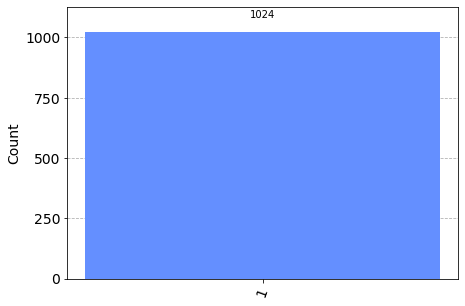

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### **Exercise #5** 
**Together**, let us create a list of 5 single qubit/single classical bit circuits using a for loop where we apply an X gate to each qubit. This simulates Alice preparing and sending 5 qubits, each in the $| 1 \rangle$ state, to Bob one at a time.


<br>

To confirm that we have created the circuits correctly, draw the 0th element of the list.

In [ ]:
circuit_list = [] #an empty list that we will append with circuits

num_qubits = # COMPLETE THIS LINE
for i in range(num_qubits):
    qc = QuantumCircuit(# COMPLETE THIS LINE
    # ADD GATE HERE

    circuit_list.append(qc)

Draw the 0th circuit

In [ ]:
circuit_list[0].draw()

#### **Exercise #6** 
**Together**, let us create a list of 5 single qubit/single classical bit circuits. For each qubit, we will put it into superposition if `alice_choices` says 'NS' for that qubit.

This simulates Alice preparing and sending 5 qubits, putting her chosen qubits in the $| + \rangle$ state, to Bob one at a time.


<br>

To confirm that we have created the circuits correctly, draw the 0th and 1st element of the list.

In [ ]:
circuit_list = [] #an empty list that we will append with circuits
alice_choices = ['NS', 'S', 'S', 'NS', 'S']

num_qubits = 5
for i in range(num_qubits):
    qc = QuantumCircuit(1, 1)
    
    # Put this qubit into a superposition if Alice's choice is 'S'
    if alice_choices[i] == 'S':
        qc.h(0)
      
    # COMPLETE THIS CODE

Draw the 0th circuit

In [ ]:
circuit_list[0].draw()

Draw the 1st circuit

In [ ]:
# Draw the 1st circuit
circuit_list[1].draw()

#### Summary 
We now know a few things: 

1. The Hadamard gate is used to create a superposition state
$$ H|0\rangle = | + \rangle $$
$$ H|1\rangle = | - \rangle $$


2. The Hadamard gate can also be used to collapse a superposition state 
$$ H|+\rangle = | 0 \rangle $$
$$ H|-\rangle = | 1 \rangle $$


3. Alice will send her qubits to Bob one at a time, preparing each one with its own circuit. We can create and store all these circuits in a list using a for loop and conditionals.

<br><br>

**Technical Note:** When we apply an H gate right before measuring, we can actually say that we are measuring in a different basis- the Hadamard basis. It turns out that applying an H gate is the same as if we just rotated our view of the Bloch sphere so the x-axis were pointing up and down. For this reason, we also call this the X Basis. You are not responsible for knowing this, but it is worth being aware of since a lot of the discussion about QKD involves bases.

The most important thing for you to know is that when someone says that Alice or Bob measures a certain qubit:
* "in the Z basis", this is exactly the same as saying Alice or Bob chooses to not put this qubit in superposition.
* "in the X basis", this is exactly the same as saying Alice or Bob chooses to put this qubit in superposition.

## **Part 2: Quantum Key Distribution (BB84)**
---

Let's implement QKD! 

Specifically, we will write code that simulates the QKD protocol between Alice and Bob such that:

* The initial key Alice wants to share with Bob is 5 bits long and is represented by the list `alice_bits`.

* Alice sends 5 qubits to Bob, each represented with its own circuit.

* We represent Alice's choices about whether to put each qubit into superposition or not using a list where `alice_choices[i] = 'NS'` if she chooses not to put qubit i into superposition and `alice_choices[i] = 'S'` if she does choose to put qubit in into superposition.

* We represent Bob's choices in a similar way: `bob_choices[i] = 'NS'` or `bob_choices[i] = 'S'`.

#### **Step #1: Alice chooses the bits for her key** 
**Together**, let's modify the following list to represent the 5 bits chosen by Alice to represent the key. Specifically, let's assume she chooses the key: 0 1 1 0 0.

In [ ]:
alice_bits = []

#### **Step #2: Alice chooses bits to put in superposition**
Modify the following list to represent choices for Alice. Specifically, let's assume she chooses:

* qubits 0, 1, and 3 are not in superposition
* qubits 2 and 4 are in superposition

In [ ]:
alice_choices = []

#### **Step #3: Alice encodes bits and sends it them Bob**
Create a list called `encoded_qubits` of circuits with one qubit and one classical bit each representing Alice's qubits. Some starter code has been given for you. Use the following rules to fill in the code rest:

* If `alice_bits[i] == 0`, do nothing. 

* If `alice_bits[i] == 1`, apply an X gate.

* If `alice_choices[i] == 'NS'`, do nothing ('NS' = no superposition).

* If `alice_choices[i] == 'S'`, put the qubit in a superposition ('S' = superpostion).

In [ ]:
encoded_qubits = [] #an empty list that we will append with circuits

for q in range(len(alice_bits)):
    qc = QuantumCircuit(1, 1)
    
    # If this bit of the key is 1, 
    # then put the qubit into the |1> state
    if alice_bits[q] == 1:
        # COMPLETE THIS LINE

    # If Alice chooses to put this qubit into superposition, 
    # then apply the H gate to do so
    if alice_choices[q]=='S':
        # COMPLETE THIS LINE

    encoded_qubits.append(qc)

Draw the 0th (index = 0) circuit in the list to make sure you are applying the right sequence of gates. 

In [ ]:
encoded_qubits[0].draw()

Draw the 2nd (index = 2) circuit in the list to make sure you are applying the right sequence of gates. 

In [ ]:
encoded_qubits[2].draw()

---
<center>

#### **Now, Alice "sends" her qubits to Bob**

</center>

---

#### **Step #4: Bob tries to guess Alice's choices**
Modify the following list to represent choices for Bob. Specifically, let's assume he chooses:

* qubits 1 - 3 are not in superposition
* qubits 0 and 4 are in superposition

In [ ]:
bob_choices = []

#### **Step #5: Bob applies his choices and measures the encoded qubits**

Modify the `encoded_qubits` list to apply Bob's choices and measure each qubit. Some starter code has been given for you. Use the following instructions to fill in the rest:

* If `bob_choices[i] == 'S'`, apply an H gate to try to take the qubit out of superposition before measuring.

* No matter what his choice is, measure each qubit.


<br>

**Run the provided code to store the measurement results for each circuit in a list called `bob_bits`.**

In [ ]:
for q in range(len(bob_choices)):

    # COMPLETE THIS CODE

    encoded_qubits[q].measure(0,0)

Draw the 0th circuit in the list to make sure you are applying the right sequence of gates. 

In [ ]:
encoded_qubits[0].draw()

**Run the code below to simulate the measurement results using QASM and store the results in the list `bob_bits`.**

In [ ]:
bob_bits = []

backend = Aer.get_backend('qasm_simulator')

for q in range(len(encoded_qubits)):

  job = execute(encoded_qubits[q], backend = backend, shots = 1, memory = True)
  result = job.result()
  measured_bit = int(result.get_memory()[0])

  bob_bits.append(measured_bit)

print(bob_bits)

---
<center>

#### **Now, Alice "calls" Bob and they compare their choices for superposition bits**

</center>

---

#### **Step #6: Alice and Bob compare notes and create their keys**

**Together**, let's compare Alice's and Bob's choices for superposition bits and create a key for Alice based on this.

In [ ]:
alice_key = []

for q in range(len(encoded_qubits)):
    if # COMPLETE THIS LINE
        # COMPLETE THIS LINE

**Independently**, compare Alice's and Bob's choices for superposition bits and create a key for Bob based on this.

In [ ]:
bob_key = []

# COMPLETE THIS CODE

#### **Step #7: Creation of the shared key**

Now that Alice and Bob have discarded the bits where their choices were not the same, the remaining bits form a shared key. To verify that the Eve did not intercept and the protocol is secure, they share a chosen sample of their key. 

1. If they find that the shared sample from both Alice and Bob  has matched, they discard these bits and use the rest of the shared key. 

2. If they find out that the shared sample does not match, they know that they have an intruder! They would need to start the process all over again.

<br>

**Together**, let's implement this as follows:
* Alice and Bob compare the 0th bit of their keys.
* If these bits are the same, then print "Secure, let's use this key without the 0th bit:" and the key itself. 
* If these bits are different, then print "Eve detected! Let's use another quantum channel."

In [ ]:
if # COMPLETE THIS LINE
  print("SECURE! Let's use this key without the 0th bit: " + str(alice_key))
else:
  # COMPLETE THIS LINE

---
<center>

#### **Congratulations, you've just coded and run the QKD BB84 Protocol!**

</center>

---

## **Part 3: Eve Intercepts!**
After **Step 3**, suppose Eve intercepts the (encoded) message that Alice has sent. Eve measures the qubits in the same way Bob would do in **Step 4** and **Step 5**.

In the space below, we have provided the full code for the protocol developed above, but with the option to specify qubits that Eve measures.

<br>

**Run this code below (several times) to see if Alice and Bob detect Eve.**

In [ ]:
# Just for printing nicely :)
line = "\n\n==================================================================\n"

#=================================================
# ALICE PREPARES HER QUBITS AND SENDS THEM TO BOB
#=================================================


# STEPS 1 - 2
#=============
alice_bits = [0, 1, 1, 0, 0]
alice_choices = ['NS', 'NS', 'S', 'NS', 'S']


# STEP 3
#========
encoded_qubits = [] #an empty list that we will append with circuits

for q in range(len(alice_bits)):
    qc = QuantumCircuit(1, 1)
    
    # If this bit of the key is 1, 
    # then put the qubit into the |1> state
    if alice_bits[q] == 1:
        qc.x(0)

    # If Alice chooses to put this qubit into superposition, 
    # then apply the H gate to do so
    if alice_choices[q]=='S':
        qc.h(0)

    encoded_qubits.append(qc)

print("Alice created the key: " + str(alice_bits))
print("She made the following choices: " + str(alice_choices))
print("Now, Alice 'sends' her qubits to Bob", end = line)

#===================
# EVE INTERCEPTS!
#===================

print("EVE INTERCEPTS!")


# EVE FOLLOWS STEP 4
#===================
for q in range(len(encoded_qubits)):
    encoded_qubits[q].measure(0,0)


# EVE FOLLOWS STEP 5
#===================
eve_bits = []

backend = Aer.get_backend('qasm_simulator')

for q in range(len(encoded_qubits)):

  job = execute(encoded_qubits[q], backend = backend, shots = 1, memory = True)
  result = job.result()
  measured_bit = int(result.get_memory()[0])

  eve_bits.append(measured_bit)

print("Eve measured: " + str(eve_bits), end = line)


# NOTE: Qiskit does not recognize multiple measurements on the same qubit. So,
# EVE MUST PREPARE NEW QUBITS TO BE SENT BASED ON HER MEASUREMENTS
#==================================================================
encoded_qubits = [] #an empty list that we will append with circuits

for q in range(len(eve_bits)):
    qc = QuantumCircuit(1, 1)
    
    # If this bit of the key is 1, 
    # then put the qubit into the |1> state
    if eve_bits[q] == 1:
        qc.x(0)

    encoded_qubits.append(qc)



#========================================================
# BOB RECEIVES THE QUBITS, UNAWARE OF EVE'S INTERCEPTION
#========================================================

# BOB FOLLOWS STEP 4
#===================
bob_choices = ['S', 'NS', 'NS', 'NS', 'S']

for q in range(len(bob_choices)):

    if bob_choices[q] == 'S':
        encoded_qubits[q].h(0)

    encoded_qubits[q].measure(0,0)


# BOB FOLLOWS STEP 5
#===================
bob_bits = []

backend = Aer.get_backend('qasm_simulator')

for q in range(len(encoded_qubits)):

  job = execute(encoded_qubits[q], backend = backend, shots = 1, memory = True)
  result = job.result()
  measured_bit = int(result.get_memory()[0])

  bob_bits.append(measured_bit)

print("Bob made the following choices before measuring: " + str(bob_choices))
print("He measured: " + str(bob_bits), end = line)


#=============================================================================
# NOW, ALICE "CALLS" BOB AND THEY COMPARE THEIR CHOICES FOR SUPERPOSITION BITS
#=============================================================================

# STEP 6
#========
alice_key = []

for q in range(len(encoded_qubits)):
    if alice_choices[q] == bob_choices[q]:
        alice_key.append(alice_bits[i])
        
        
bob_key = []

for q in range(len(encoded_qubits)):
    if alice_choices[q] == bob_choices[q]:
       bob_key.append(bob_bits[i])
       

# STEP 7
#========
print("Alice calls Bob and they compare their choices for superposition bits")
print("Based on this, Alice says:")

if alice_key[0] == bob_key[0]:
  print("SECURE! Let's use this key without the 0th bit: " + str(alice_key))
else:
  print("EVE DETECTED! Let's use another quantum channel.")

# End of Notebook
---
© 2022 The Coding School, All rights reserved